In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
try:
    data=pd.read_csv(r"C:\Users\91938\Desktop\Top Mentor\Machine Learning\15th November\Decision Tree  - Assignment -4\iphone_purchase_records.csv")
    print(data.head(2))
except Exception as e:
    print(e)
    

  Gender  Age  Salary  Purchase Iphone
0   Male   19   19000                0
1   Male   35   20000                0


In [16]:
df=data
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [17]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [18]:
d={'Male':1,'Female':0}
d

{'Male': 1, 'Female': 0}

In [19]:
df['Gender']=df['Gender'].map(d)

In [12]:
df.head(5)

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


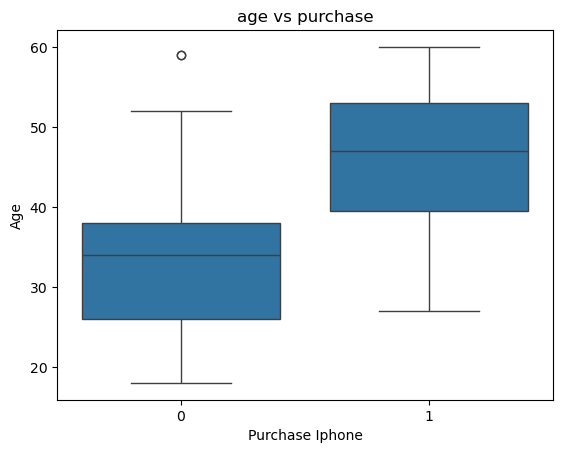

In [117]:
sns.boxplot(x='Purchase Iphone', y='Age', data=df)
plt.title("age vs purchase")
plt.show()
#Buyers generally belong to a higher age group

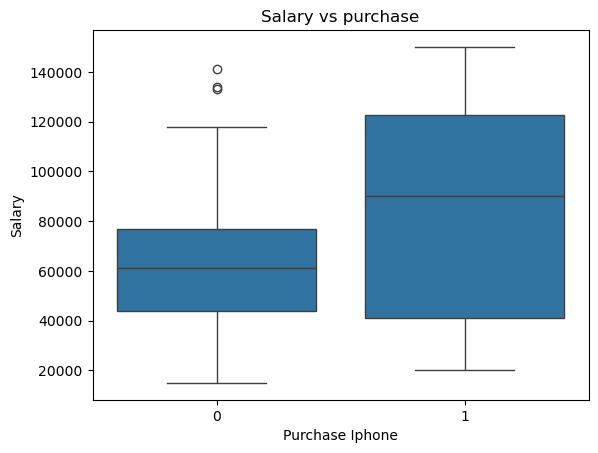

In [118]:
sns.boxplot(x='Purchase Iphone', y='Salary', data=df)
plt.title("Salary vs purchase")
plt.show()
#Higher salary customers are more likely to purchase

<Axes: xlabel='Age', ylabel='Salary'>

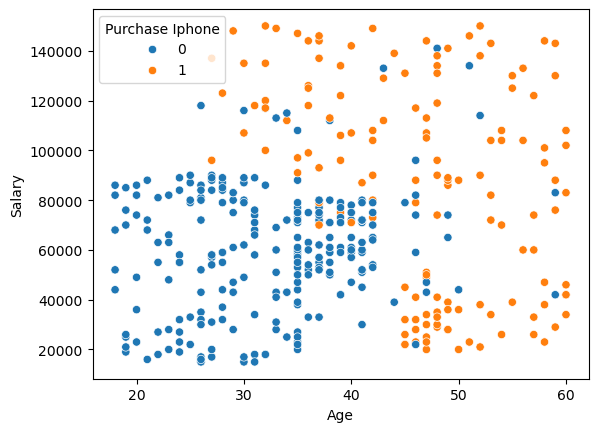

In [119]:
sns.scatterplot(x='Age', y='Salary', hue='Purchase Iphone', data=df)


In [20]:
X=df[['Gender', 'Age', 'Salary']]
y=df['Purchase Iphone']
df.shape

(400, 4)

In [21]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)
X_train.shape, X_test.shape

((240, 3), (160, 3))

In [152]:
from sklearn.tree import DecisionTreeClassifier, plot_tree #gives feature importance and can do feature selection aswell
from sklearn.ensemble import RandomForestClassifier #gives feature importance and can do feature selection aswell

In [144]:
dst=DecisionTreeClassifier()

In [145]:
dst.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [146]:
pred=dst.predict(X_test)
pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0])

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [148]:
acc=accuracy_score(y_test,pred)

In [149]:
acc

0.8875

In [150]:
cf=confusion_matrix(y_test,pred)
cf

array([[91,  9],
       [ 9, 51]])

In [151]:
dst.feature_importances_

array([0.03155574, 0.48055741, 0.48788685])

In [33]:
#Salary is an important feature to predict if they will purchase or not
#age is second most important feature
#gender ha minimal influence

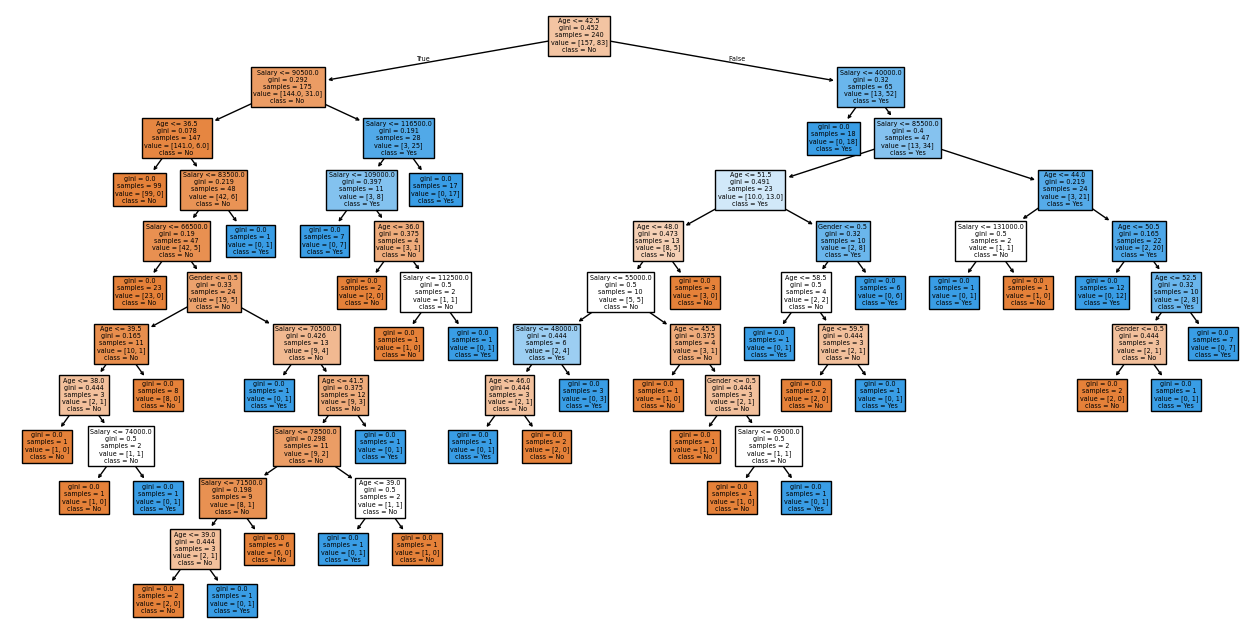

In [155]:
plt.figure(figsize=(16,8))
plot_tree(
    dst,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True
)
plt.show()

In [ ]:
#The Decision Tree classifier successfully captured non-linear relationships between age, salary, and purchase behavior. 
#Salary emerged as the most influential feature, followed by age, while gender had a minimal impact. 
#The model provided clear decision rules and achieved reliable prediction accuracy without requiring feature scaling.